In [33]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

trainData_df = pd.read_json('./train.json')
testData_df = pd.read_json('./test.json')
# sample_df = pd.read_csv('../sample_submission.csv')


def  count_list_of_ingred(string):       
    all_ingred = []
    for (idx, row) in trainData_df.iterrows():
        if (row.loc['cuisine'] == string):
            for item in row.ingredients:
                all_ingred.append(item)
    return all_ingred

In [34]:
#getting the set of cuisines
trainData_df['cuisine']

#getting the set of cuisines
cuisine_set = set()
list_of_cuisines = []

for item in trainData_df['cuisine']:
    cuisine_set.add(item)
list_of_cuisines = list(cuisine_set)

In [49]:
#to show a list of the ingredients from the list of test.json
cuisine_test_dataframe['ingredients'][19]

['cold water',
 'chicken drumsticks',
 'chicken thighs',
 'chicken seasoning mix',
 'salt',
 'vegetable oil',
 'all-purpose flour',
 'eggs',
 'buttermilk']

In [50]:
predicted_ingredients = cuisine_test_dataframe['ingredients'][19]

In [51]:
from collections import Counter

# greek_ingrediants_list = count_list_of_ingred('italian')
indian_ingredients_list = count_list_of_ingred('indian')
# filipino_ingredients_list = count_list_of_ingred('filipino')
# irish_ingredients_list = count_list_of_ingred('irish')
# vietnamese_ingredients_list = count_list_of_ingred('vietnamese')
# jamaican_ingredients_list = count_list_of_ingred('jamaican')
mexican_ingredients_list =count_list_of_ingred('mexican')
# russian_ingredients_list = count_list_of_ingred('russian')
# spanish_ingredients_list = count_list_of_ingred('spanish')
# brazilian_ingredients_list =count_list_of_ingred('brazilian')
british_ingredients_list =count_list_of_ingred('british')
italian_ingredients_list = count_list_of_ingred('italian')
# thai_ingredients_list = count_list_of_ingred('thai')
# moroccan_ingredients_list = count_list_of_ingred('moroccan')
# korean_ingredients_list = count_list_of_ingred('korean')
# cajun_ingredients_list = count_list_of_ingred('cajun')
# french_ingredients_list = count_list_of_ingred('french')
southern_us_ingredients_list = count_list_of_ingred('southern_us')
# greek_ingredients_list = count_list_of_ingred('greek')
# japanese_ingredients_list = count_list_of_ingred('japanese')
# chinese_ingredients_list = count_list_of_ingred('chinese')
cajun_creole_list = count_list_of_ingred('cajun_creole')


def return_sorted_max(ingred_list):
    c = Counter(ingred_list)
    ingred_counter_df = pd.DataFrame(list(c.items()), columns=['ingredients', 'count'])
    grouped_sort_max_first = ingred_counter_df.sort_values(['count'], ascending=False)
    return grouped_sort_max_first

grouped_sort_max_first = return_sorted_max(southern_us_ingredients_list)

In [52]:
features = []
counts=[]
for i, r in grouped_sort_max_first.iterrows():
    j = r['ingredients']
    c = r['count']
    features.append(j)
    counts.append(c)

In [53]:
# tuple(counts[:35])
max_bar = counts[0]
print(max_bar)

2290


In [54]:

boolean_ingred_list = [0]* len(grouped_sort_max_first)

features = []
counts=[]
for i, r in grouped_sort_max_first.iterrows():
    j = r['ingredients']
    c = r['count']
    features.append(j)
    counts.append(c)

#max count of thge most used ingredient for each cuisine 
max_bar = counts[0]

#to create the red bars 
for i, r in grouped_sort_max_first.iterrows():
    for item in predicted_ingredients:
        if item == r['ingredients']:
               boolean_ingred_list[i] = max_bar
        



In [55]:
#make sure these numbers are same
len(grouped_sort_max_first)

2462

In [56]:
#make sure they are same 
len(boolean_ingred_list)

2462

In [57]:
#max size for the bar chart for single ingredient to show for predicted ingredient
for item in boolean_ingred_list:
    if item == max_bar:
        print(item)

2290
2290
2290
2290
2290
2290
2290
2290


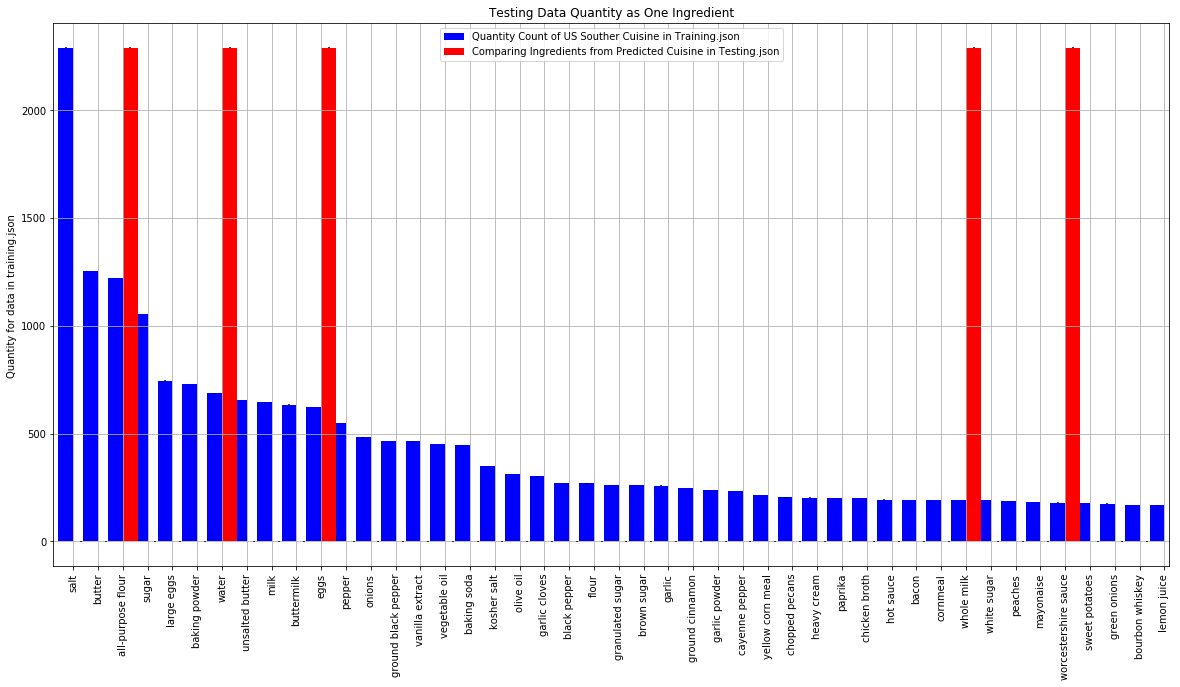

In [65]:
#change the ingredients size shown in graph with N, THE NUMBER OF BARS SHOWN IN GRAPH
N = 45

#CHANGE THE SIZE OF GRAPH WITH fig_size[0] AND fig_size[1]
fig_size = plt.rcParams["figure.figsize"]
fig_size
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

men_means = tuple(counts[:N ])        
men_std = tuple([1] * N )

ind = np.arange(N)   
width = 0.6      # the width of the bars


ax = grouped_sort_max_first.head(N ).plot.bar(grid=True)
rects1 =ax.bar(ind, men_means, width, color='b', yerr=men_std)

women_means = tuple(boolean_ingred_list[:N ])
women_std = tuple([1] * N )
rects2 = ax.bar(ind + width, women_means, width, color='R', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Quantity for data in training.json ')
ax.set_title('Testing Data Quantity as One Ingredient')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(features)

name_of_cuisine = 'US Souther Cuisine'
                                    #Change the name of cuisine here that's being predicted
ax.legend((rects1[0], rects2[0]), ('Quantity Count of US Souther Cuisine in Training.json', 'Comparing Ingredients from Predicted Cuisine in Testing.json'))


plt.show()

In [131]:
#Edwin your code is used for the listing predicted values

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from numpy import array
from sklearn.linear_model import LogisticRegression

cuisine_train_dataframe = pd.read_json('./train.json')
cuisine_test_dataframe = pd.read_json('./test.json')

feature_cols = ['ingredients']

X = cuisine_train_dataframe[feature_cols]

Y = cuisine_test_dataframe[['ingredients']]

# converting array of strings for each json object to array of 1's and zeros by finding the number of unique strings 
#in all arrays in total
# and creating that many columns and looping through all strings in the arrays and finding their index and setting it to 1 

keys = set()

for ing_list in X['ingredients']:
    for ing in ing_list:
        keys.add(ing)

for ing_list in Y['ingredients']:
    for ing in ing_list:
        keys.add(ing)  
        
             
encoded = np.zeros(len(X) * len(keys)).reshape((len(X), len(keys)))
    
key_list = list(keys)

my_index = 0

for l in X['ingredients']:
    for item in l:
        index = key_list.index(item)
        encoded[my_index][index] = 1
    my_index += 1
    
X = np.array(encoded)

print("the 2nd json object has total ingredients: ")
np.count_nonzero(X[1] == 1)
# 11 columns are set to 1 
y = cuisine_train_dataframe['cuisine'] 

# encode the testing data to zeros and ones as well 

encoded2 = np.zeros(len(Y) * len(keys)).reshape((len(Y), len(keys)))
    
my_index2 = 0

for l in Y['ingredients']:
    for item in l:
        index = key_list.index(item)
        encoded2[my_index2][index] = 1
    my_index2 += 1
    

Y = np.array(encoded2)

logReg = LogisticRegression()
logReg.fit(X, y)

y_predict = logReg.predict(Y)
y_predict
print(y_predict)

the 2nd json object has total ingredients: 
['british' 'southern_us' 'italian' ..., 'italian' 'southern_us' 'mexican']


In [3]:
#PUT INTO A LIST OF STRINGS
predicted_list = []
for item in y_predict:
    predicted_list.append(str(item))

#get list with index number for graphing ingredients and cuisineSTRINGS
count = 0
for item in predicted_list:
    print(str(count)+': '+ item)
    count +=1

0: british
1: southern_us
2: italian
3: cajun_creole
4: italian
5: southern_us
6: spanish
7: chinese
8: mexican
9: british
10: italian
11: greek
12: indian
13: italian
14: southern_us
15: french
16: mexican
17: southern_us
18: mexican
19: southern_us
20: japanese
21: indian
22: spanish
23: vietnamese
24: italian
25: southern_us
26: vietnamese
27: korean
28: italian
29: italian
30: mexican
31: thai
32: mexican
33: japanese
34: chinese
35: mexican
36: russian
37: indian
38: indian
39: cajun_creole
40: cajun_creole
41: chinese
42: french
43: mexican
44: italian
45: italian
46: spanish
47: russian
48: vietnamese
49: chinese
50: italian
51: thai
52: indian
53: italian
54: italian
55: chinese
56: italian
57: japanese
58: chinese
59: cajun_creole
60: french
61: mexican
62: filipino
63: korean
64: mexican
65: greek
66: mexican
67: thai
68: italian
69: italian
70: italian
71: indian
72: thai
73: brazilian
74: indian
75: japanese
76: indian
77: mexican
78: southern_us
79: greek
80: chinese
81: s

1030: indian
1031: cajun_creole
1032: italian
1033: mexican
1034: japanese
1035: mexican
1036: indian
1037: japanese
1038: irish
1039: cajun_creole
1040: italian
1041: mexican
1042: mexican
1043: cajun_creole
1044: vietnamese
1045: mexican
1046: mexican
1047: brazilian
1048: italian
1049: mexican
1050: italian
1051: thai
1052: french
1053: indian
1054: french
1055: filipino
1056: french
1057: jamaican
1058: french
1059: french
1060: french
1061: russian
1062: french
1063: spanish
1064: chinese
1065: southern_us
1066: mexican
1067: greek
1068: french
1069: italian
1070: french
1071: mexican
1072: mexican
1073: indian
1074: chinese
1075: cajun_creole
1076: italian
1077: greek
1078: indian
1079: italian
1080: french
1081: korean
1082: italian
1083: italian
1084: french
1085: italian
1086: chinese
1087: chinese
1088: greek
1089: french
1090: french
1091: italian
1092: mexican
1093: southern_us
1094: italian
1095: italian
1096: mexican
1097: filipino
1098: southern_us
1099: southern_us
1100

3539: italian
3540: southern_us
3541: italian
3542: chinese
3543: indian
3544: italian
3545: mexican
3546: indian
3547: chinese
3548: chinese
3549: french
3550: greek
3551: italian
3552: southern_us
3553: irish
3554: french
3555: moroccan
3556: mexican
3557: french
3558: korean
3559: french
3560: chinese
3561: brazilian
3562: spanish
3563: mexican
3564: italian
3565: cajun_creole
3566: southern_us
3567: french
3568: french
3569: italian
3570: indian
3571: japanese
3572: french
3573: mexican
3574: french
3575: greek
3576: italian
3577: southern_us
3578: chinese
3579: british
3580: italian
3581: french
3582: indian
3583: mexican
3584: vietnamese
3585: french
3586: mexican
3587: italian
3588: greek
3589: greek
3590: japanese
3591: filipino
3592: indian
3593: chinese
3594: spanish
3595: cajun_creole
3596: mexican
3597: indian
3598: korean
3599: mexican
3600: italian
3601: cajun_creole
3602: thai
3603: chinese
3604: british
3605: greek
3606: italian
3607: southern_us
3608: mexican
3609: kor

6495: italian
6496: greek
6497: korean
6498: french
6499: indian
6500: italian
6501: chinese
6502: southern_us
6503: french
6504: mexican
6505: filipino
6506: italian
6507: korean
6508: chinese
6509: japanese
6510: southern_us
6511: spanish
6512: italian
6513: italian
6514: mexican
6515: italian
6516: russian
6517: mexican
6518: italian
6519: irish
6520: moroccan
6521: mexican
6522: japanese
6523: italian
6524: mexican
6525: chinese
6526: mexican
6527: thai
6528: indian
6529: korean
6530: spanish
6531: chinese
6532: japanese
6533: chinese
6534: greek
6535: southern_us
6536: southern_us
6537: italian
6538: southern_us
6539: italian
6540: italian
6541: italian
6542: italian
6543: italian
6544: russian
6545: mexican
6546: thai
6547: filipino
6548: mexican
6549: korean
6550: korean
6551: italian
6552: italian
6553: italian
6554: italian
6555: korean
6556: mexican
6557: french
6558: british
6559: mexican
6560: cajun_creole
6561: thai
6562: southern_us
6563: italian
6564: thai
6565: spanish


8907: italian
8908: greek
8909: mexican
8910: mexican
8911: japanese
8912: thai
8913: southern_us
8914: cajun_creole
8915: italian
8916: indian
8917: italian
8918: mexican
8919: indian
8920: italian
8921: french
8922: italian
8923: japanese
8924: chinese
8925: italian
8926: chinese
8927: indian
8928: italian
8929: italian
8930: vietnamese
8931: mexican
8932: southern_us
8933: italian
8934: russian
8935: southern_us
8936: japanese
8937: spanish
8938: mexican
8939: russian
8940: japanese
8941: mexican
8942: mexican
8943: mexican
8944: italian
8945: italian
8946: italian
8947: mexican
8948: indian
8949: italian
8950: mexican
8951: italian
8952: korean
8953: indian
8954: italian
8955: italian
8956: indian
8957: thai
8958: french
8959: indian
8960: chinese
8961: mexican
8962: cajun_creole
8963: thai
8964: thai
8965: indian
8966: cajun_creole
8967: greek
8968: indian
8969: italian
8970: mexican
8971: southern_us
8972: chinese
8973: southern_us
8974: japanese
8975: cajun_creole
8976: japanese